In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

## Pré-processamento dos dados

In [2]:
# Lendo o banco de dados
df = pd.read_csv("Cancer_Data.csv")

# Separando os labels e os valores
data_values = df.iloc[:, 2:-1].values
data_labels = df.iloc[:, 1:2].values

# Normalizando os valores antes de realizar o treino
data = (data_values - np.mean(data_values, axis=0)) / np.std(data_values, axis=0)

# Separando as instâncias em um conjunto de treinamento e um de teste
train_data, test_data, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.2, random_state=42)

# Aplicando o algoritmo de Arvore de decisão combinando diferentes parametros

Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 15, 'splitter': 'best'}
Acurácia correspondente: 0.9649275362318841


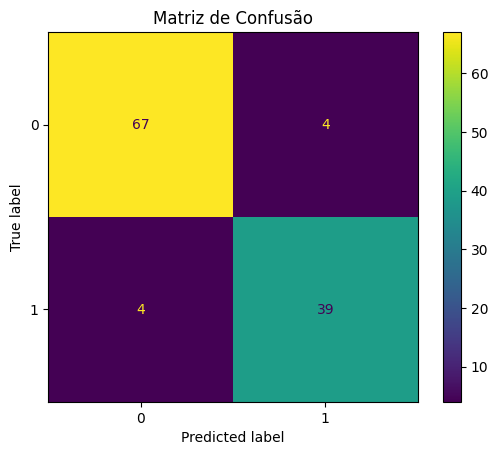

In [3]:
# Definindo a lista de parâmetros a serem testados
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16],
    'max_features': ["sqrt", "log2", None]
}

# Criando e treiando o modelo de árvore de decisão
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(train_data, train_labels)

print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Acurácia correspondente: {grid_search.best_score_}")

# Plotado a Matriz de Confusão
labels_pred = grid_search.predict(test_data)
cm = confusion_matrix(test_labels, labels_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de Confusão")
plt.show()

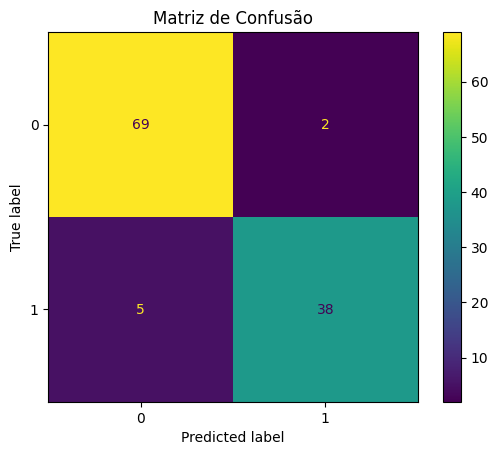

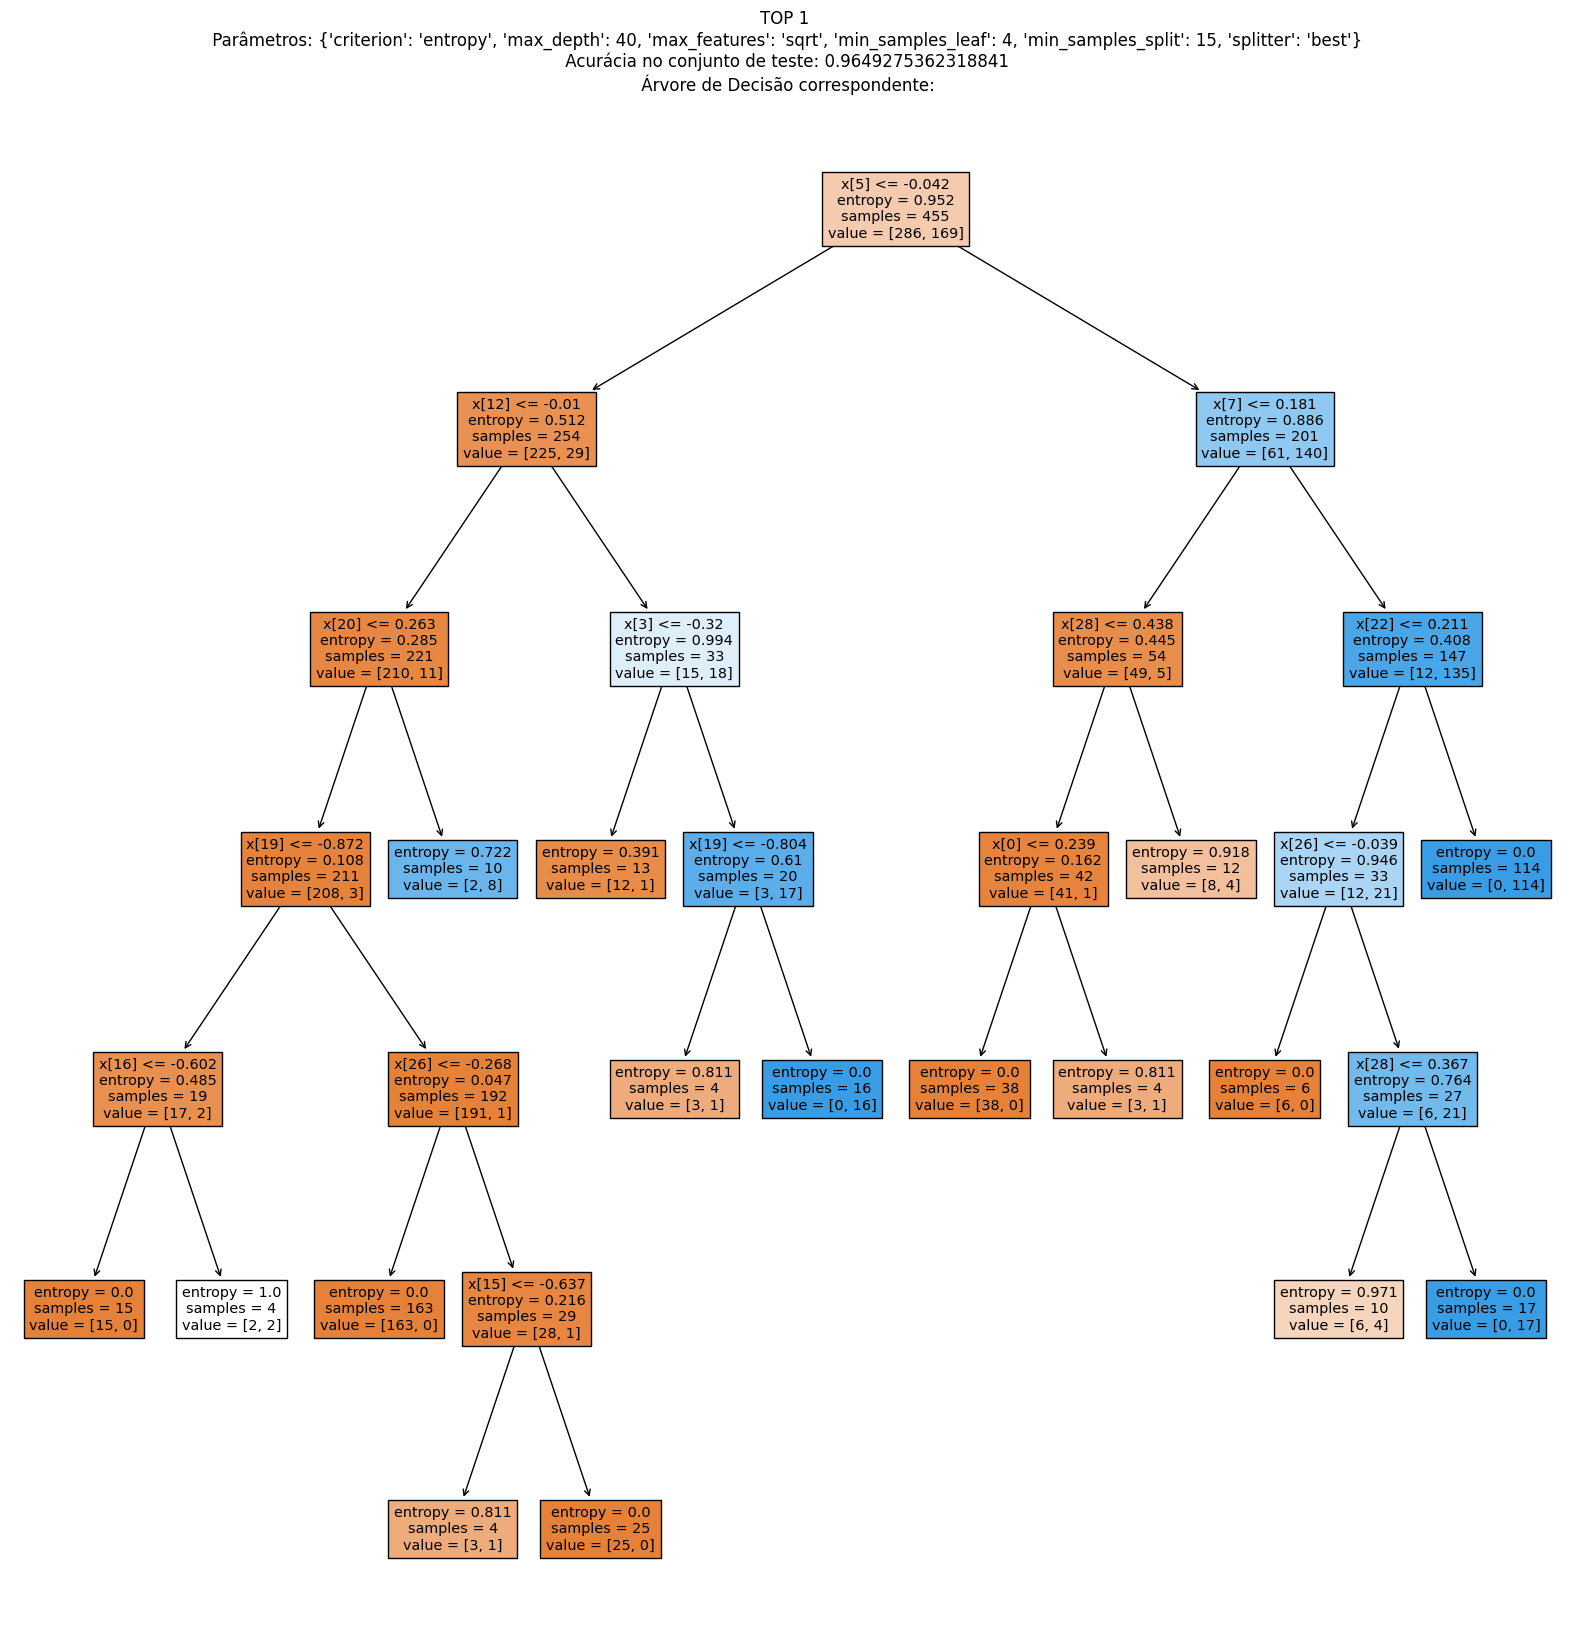

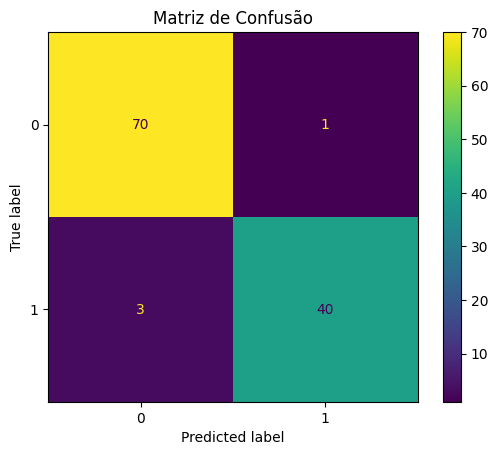

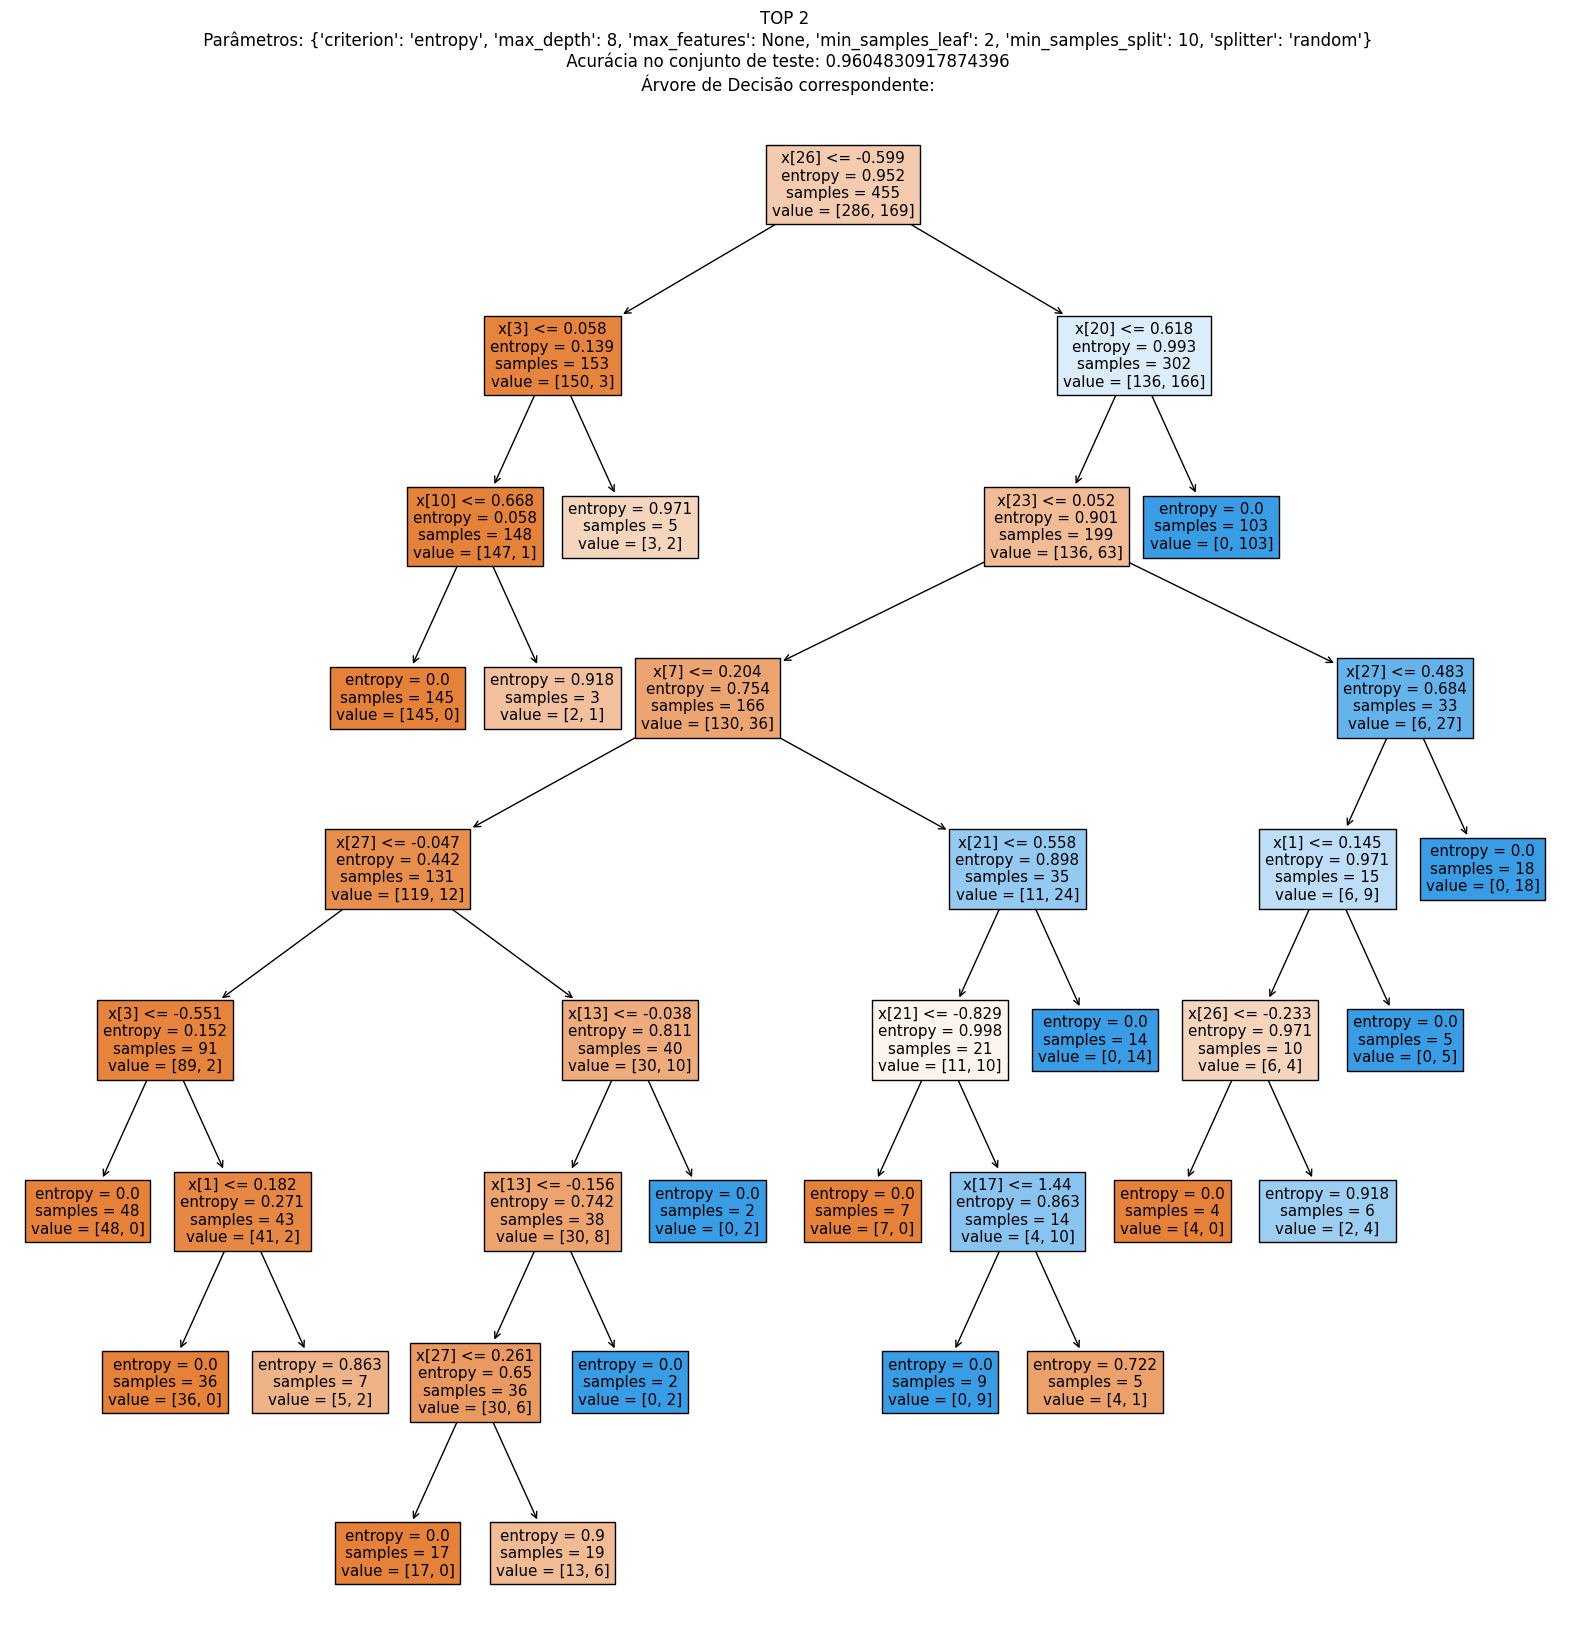

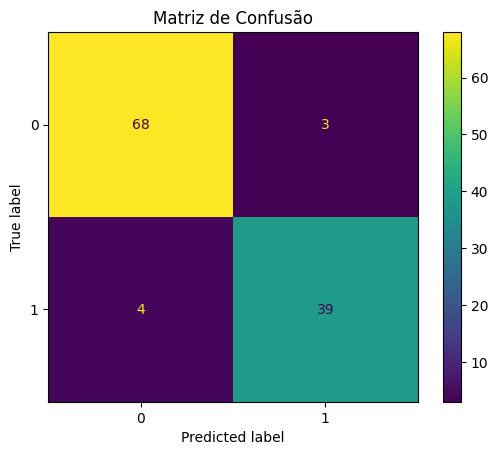

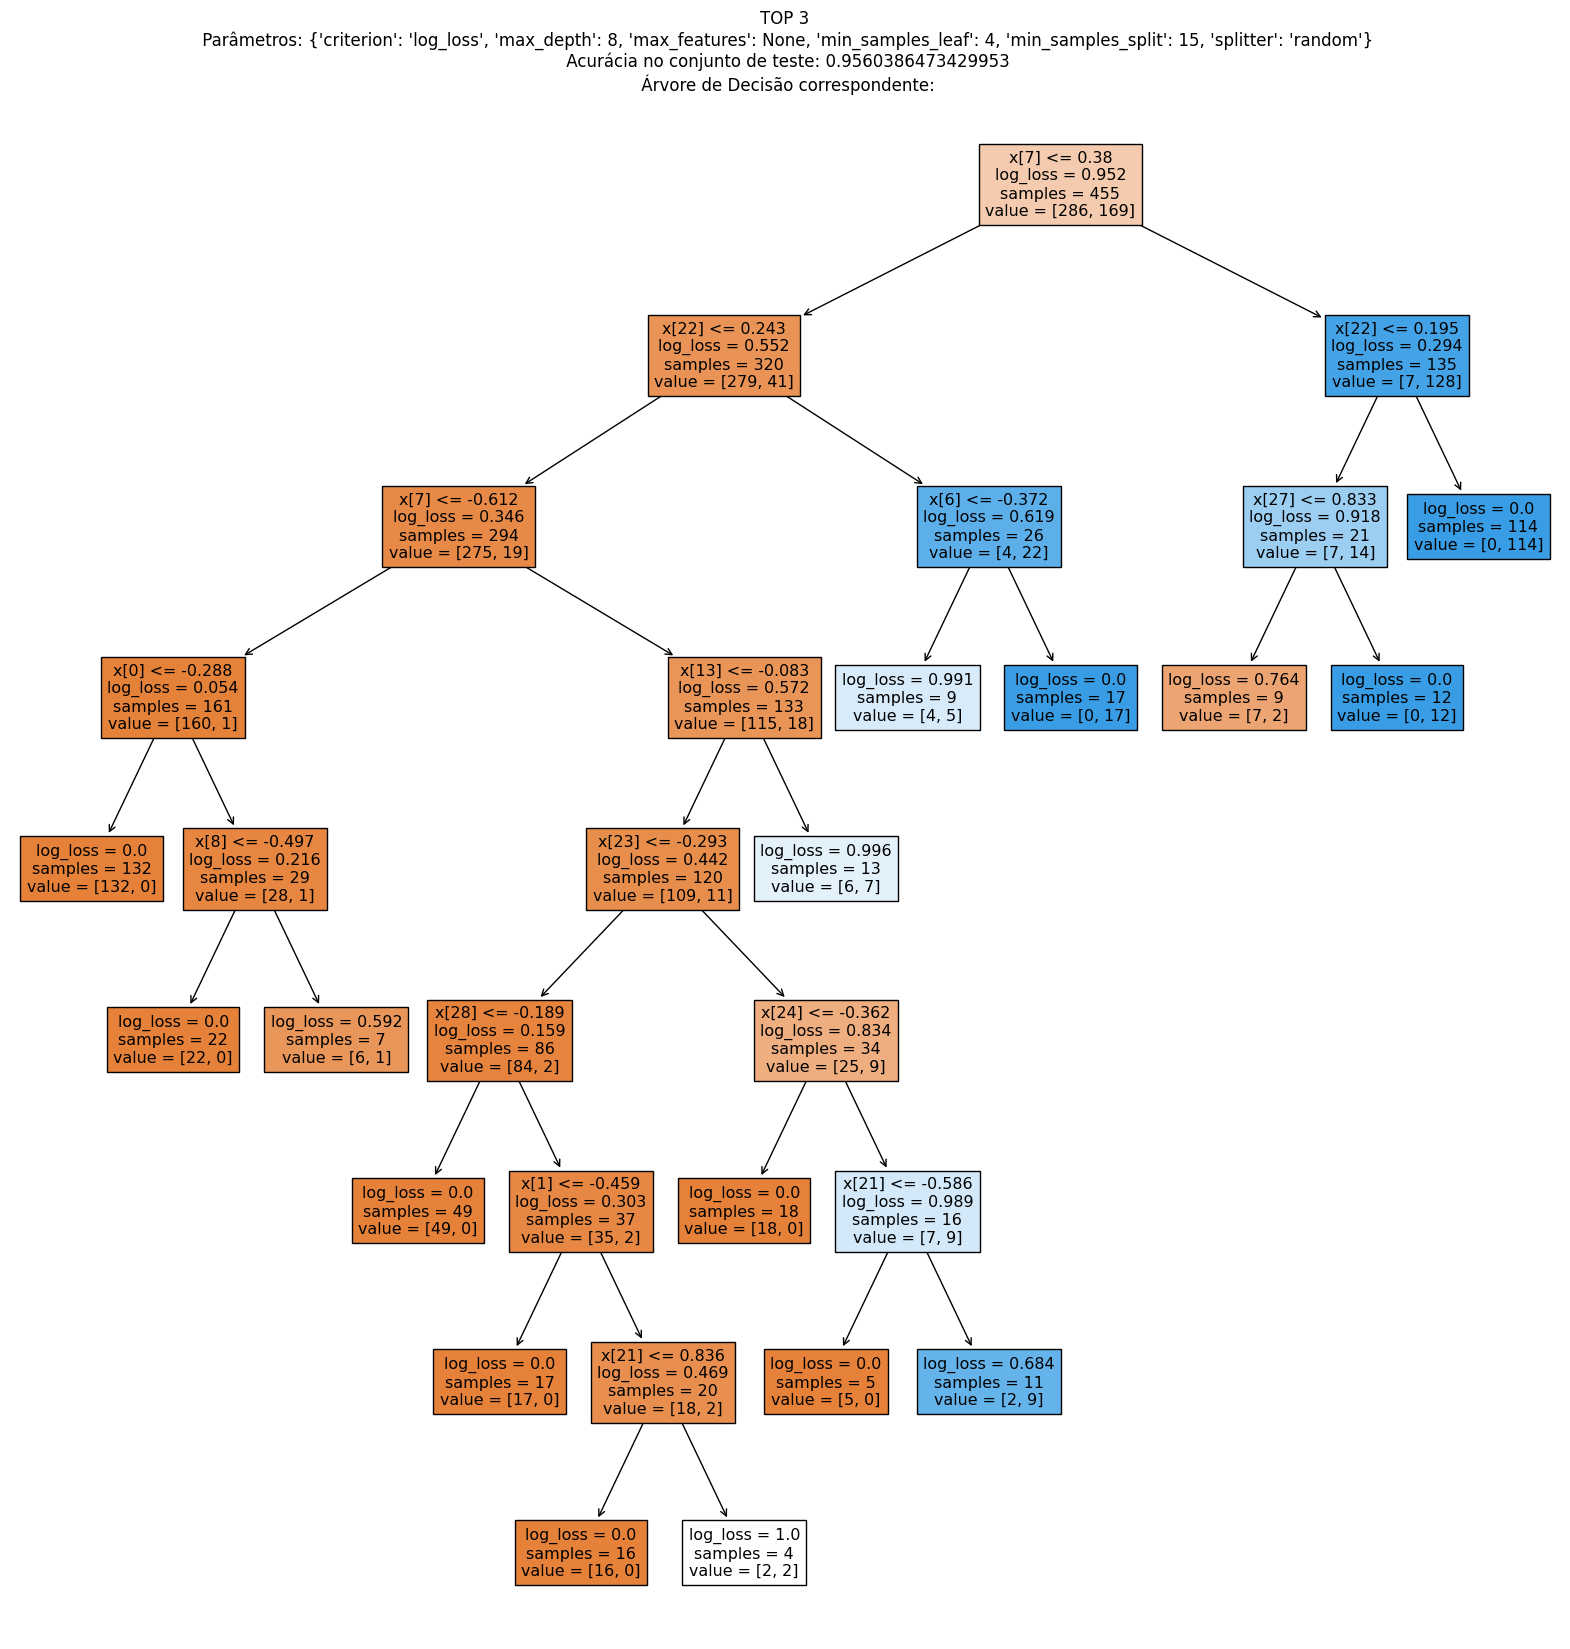

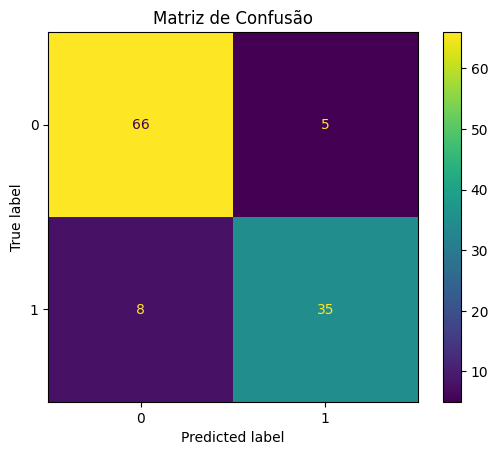

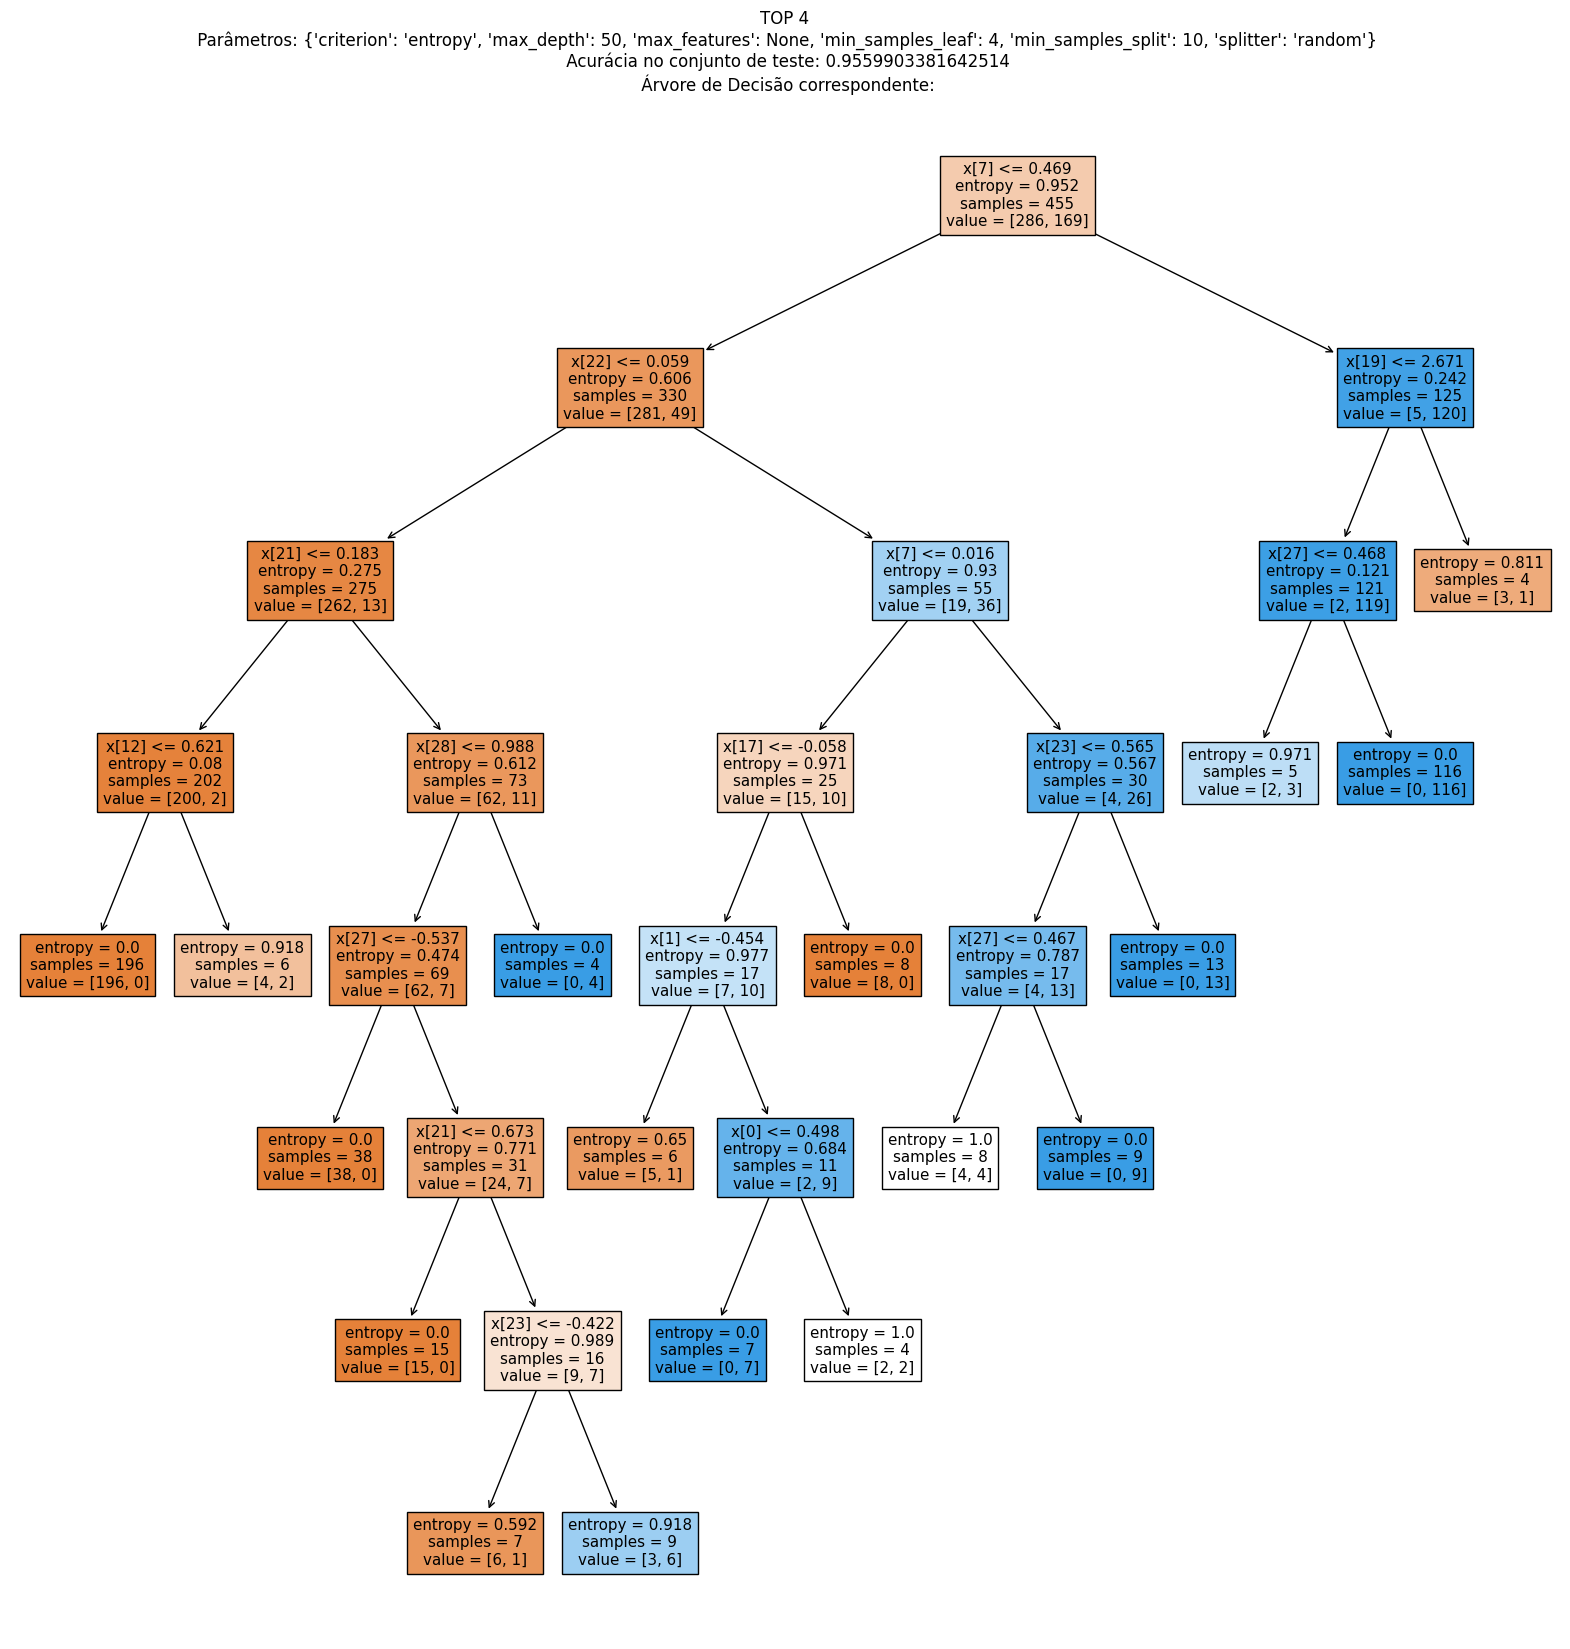

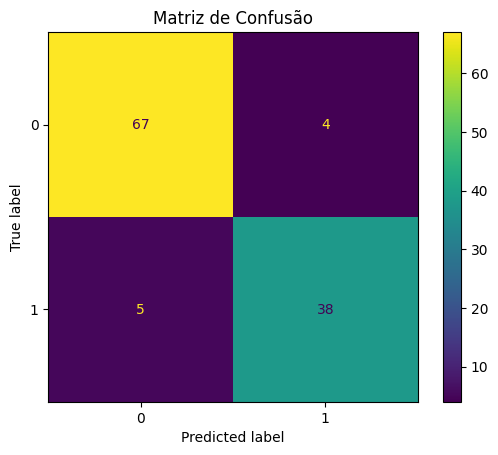

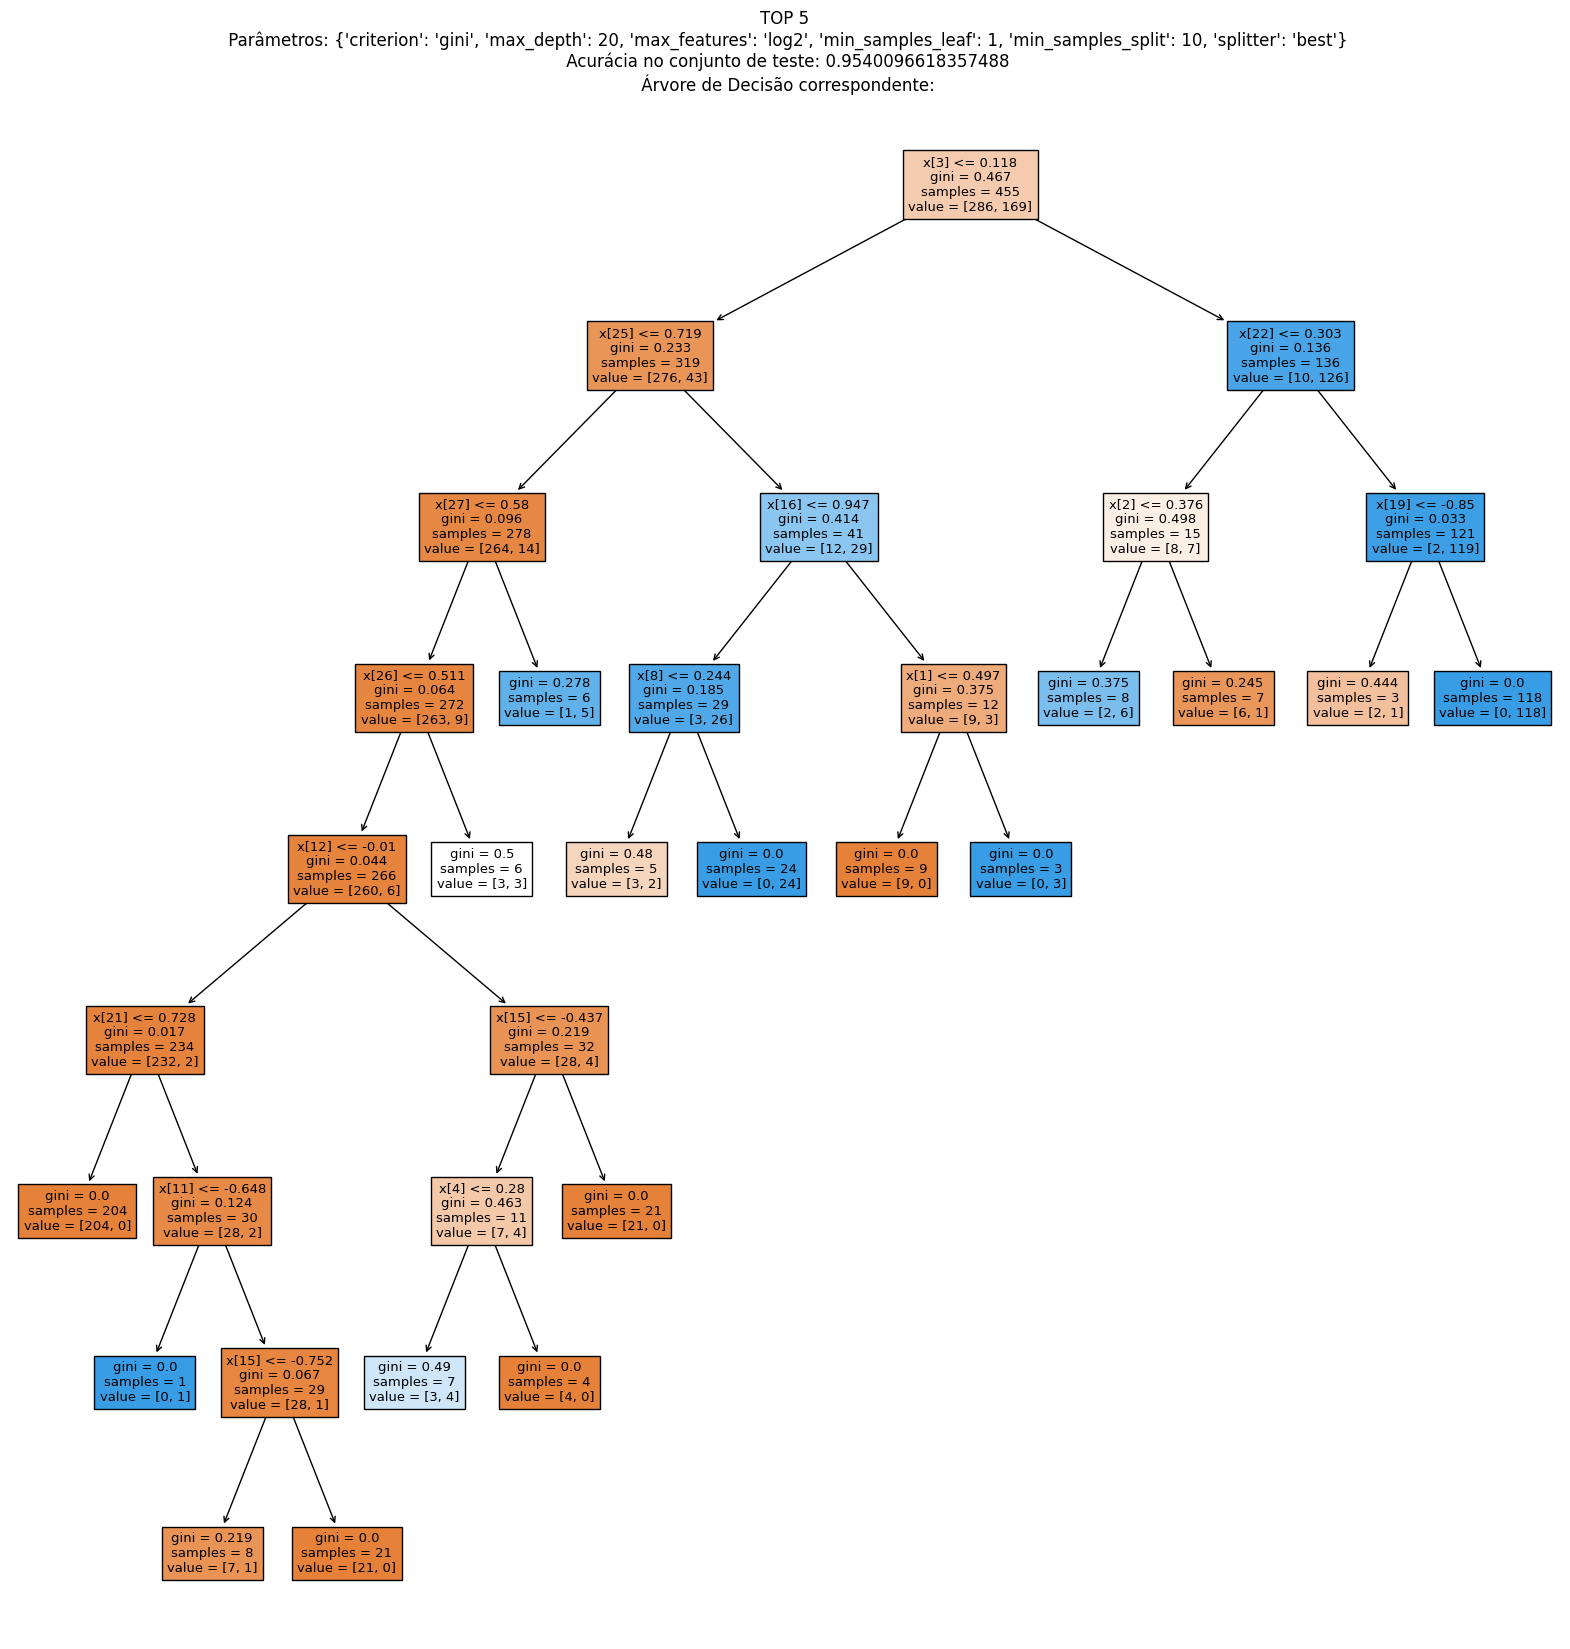

In [4]:
# Retornando o top 5 dos resultados com maior acurácia média
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
top_results = results.head()

for i, (params, mean_score) in enumerate(zip(top_results['params'], top_results['mean_test_score'])):
    # Criando e treinando o modelo
    dt = DecisionTreeClassifier(**params)
    dt.fit(train_data, train_labels)

    # Criando o modelo de matrix de confusão
    model_local = dt.predict(test_data)
    labels_pred = dt.predict(test_data)
    cm = confusion_matrix(test_labels, labels_pred)

    # Plotado a Matriz de Confusão
    display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title("Matriz de Confusão")
    plt.show()

    # Plotando a Árvore de Decisão
    plt.figure(figsize=(20,20))
    plot_tree(dt, filled=True)
    plt.title(f"TOP {i+1}\n Parâmetros: {params}\n Acurácia no conjunto de teste: {mean_score}\n Árvore de Decisão correspondente:")
    plt.show()


